In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv")

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


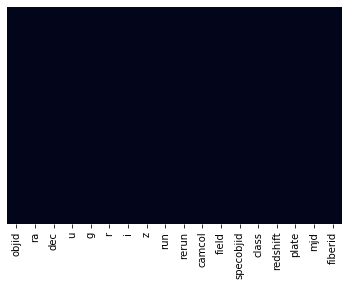

In [5]:
#checking the null values via visulaisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

 - We can see that we dont have any null values in tha dataset

In [6]:
df.drop(['objid','specobjid','fiberid','rerun'],axis=1,inplace=True)

 - Here I am dropping all the Id's column and rerun column as its not useful for the analysis

In [7]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922


Observations:-
- The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.
- run = Run Number
- rereun = Rerun Number
- camcol = Camera column
- field = Field number
- redshift = Final Redshift(redshift happens when light or other electromagnetic radiation from an object is increased in     wavelength, or shifted to the red end of the spectrum).
- plate = plate number
- mjd = MJD of observation
- ra and Dec are basically the lines of longitude and latitude projected onto the celestial sphere. The equator becomes the celestial equator, and the north and south poles becomes the north and south celestial poles respectively.

# Univariate Analysis:

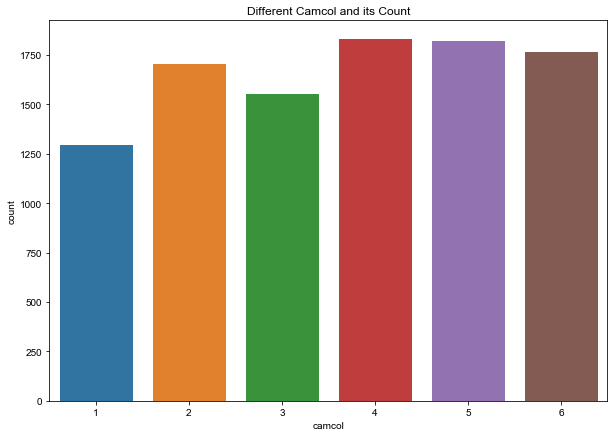

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [8]:
plt.subplots(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot("camcol",data=df)
plt.title("Different Camcol and its Count")
plt.show()

print(df.camcol.value_counts())

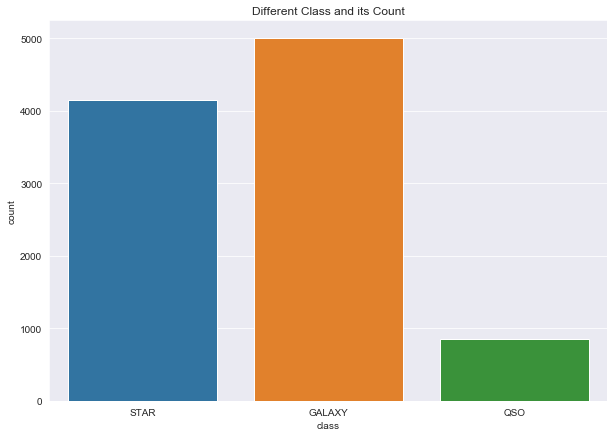

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [9]:
plt.subplots(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot("class",data=df)
plt.title("Different Class and its Count")
plt.show()

print(df['class'].value_counts())

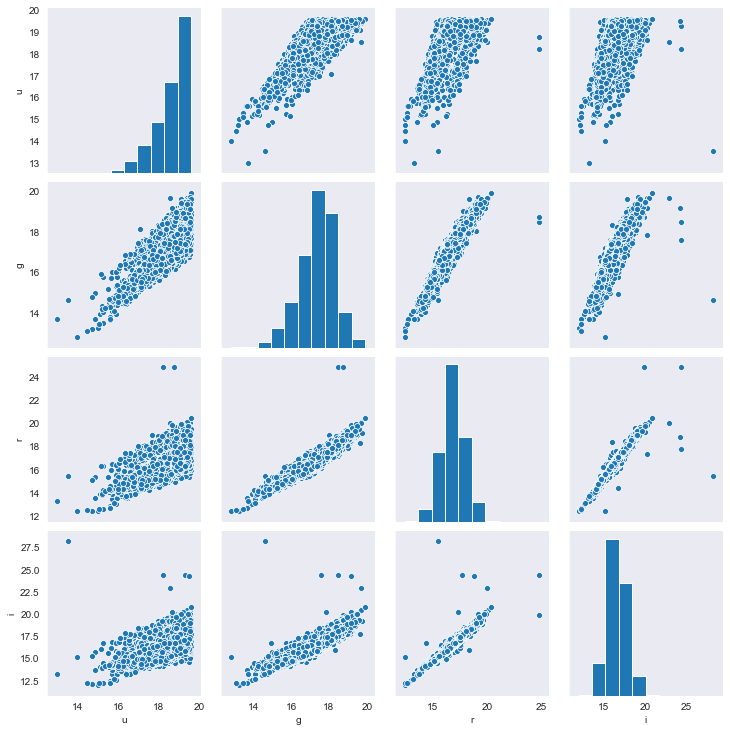

In [10]:
sns.set_style("dark")
sns.pairplot(df[['u','g','r','i']])

 - SDSS measures magnitudes in five different colors by taking images through five color filters. A filter is a kind of screen that blocks out all light except for light with a specific color. The SDSS telescope's filters are green (g), red (r), and three colors that correspond to light not visible to the human eye: ultraviolet (u), and two infrared wavelengths (i and z).
 
 - Color is symbolized by subtracting the magnitudes: u-g, g-r, r-i, and so on. All these quantities involve magnitude, so they decrease with increasing light output. A star with a high g-r color is redder than a star with a low g-r color.


Text(0.5, 1.0, 'Ultraviolet light distribution')

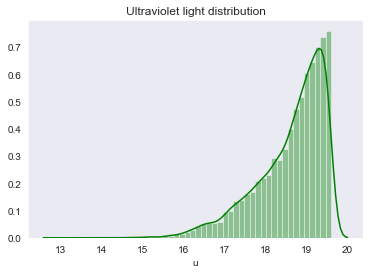

In [11]:
sns.distplot(df['u'],color='green')
plt.title("Ultraviolet light distribution")

 - We can see that the column u is negatively skewed

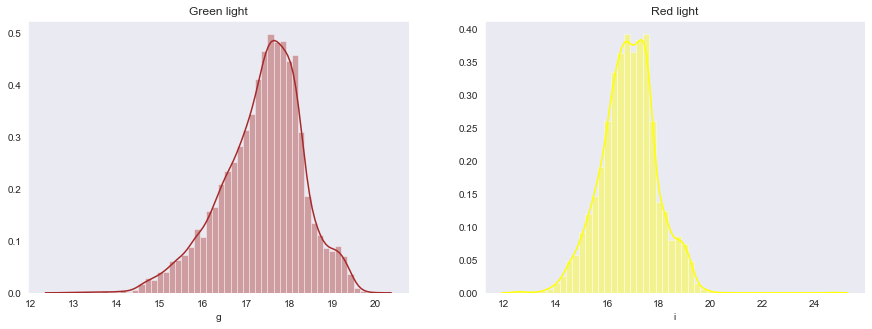

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['g'],color='brown',ax=ax1)
sns.distplot(df['r'],color='yellow',ax=ax2)
ax1.set_xlabel("g")
ax2.set_xlabel("i")
ax1.set_title("Green light")
ax2.set_title("Red light")
plt.show()

 - These two lights are having wavelength that can be seen by our eyes and we don't need any special telescope.
 - Both oh lights are almost normally distributed

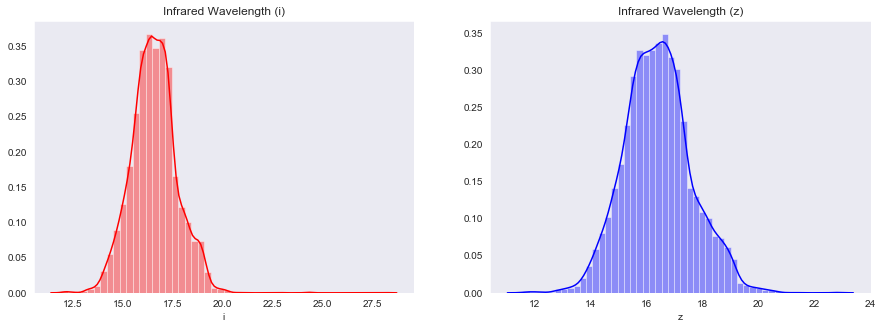

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['i'],color='r',ax=ax1)
sns.distplot(df['z'],color='b',ax=ax2)
ax1.set_xlabel("i")
ax2.set_xlabel("z")
ax1.set_title("Infrared Wavelength (i)")
ax2.set_title("Infrared Wavelength (z)")
plt.show()

 - These two lights are having wavelength that can be not be detected by our eyes so we need special telescopes.
 - Infrared waves have longer wavelengths than visible light and can pass through dense regions of gas and dust in space with less scattering and absorption. Thus, infrared energy can also reveal objects in the universe that cannot be seen in visible light using optical telescopes.
 - Also, Both the columns i and z are almost normally distributed

In [14]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['class']
for i in variable:
    df[i] = lb.fit_transform(df[i])

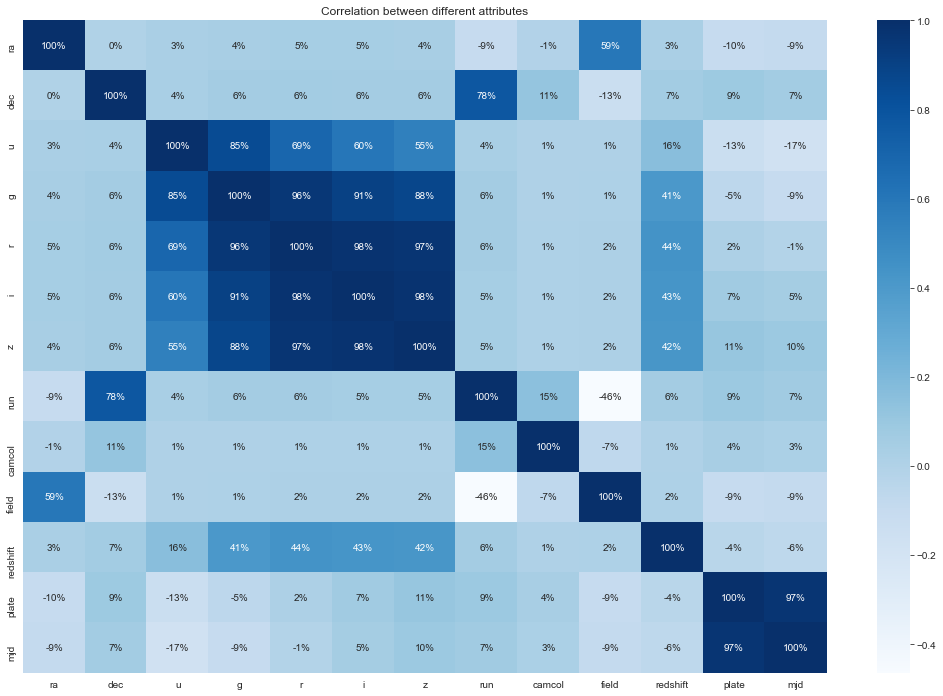

In [15]:
#Correlation of different Attribbutes
plt.figure(figsize=(18,12))
sns.heatmap(df.drop('class',axis=1).corr(),annot=True,fmt='.0%',cmap='Blues')
plt.title("Correlation between different attributes")
plt.show()

 - From the above correlation heatmap we can see that columns u, g, r, i, z and redshift are highly correlated. So, we'll use these columns for classification.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

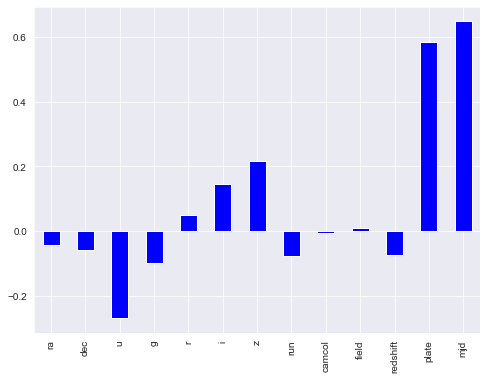

In [16]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
df.drop(['class'],axis=1).corrwith(df['class']).plot(kind='bar',grid=True,color='b')
plt.xticks(rotation=90)

# Plotting the Outliers:

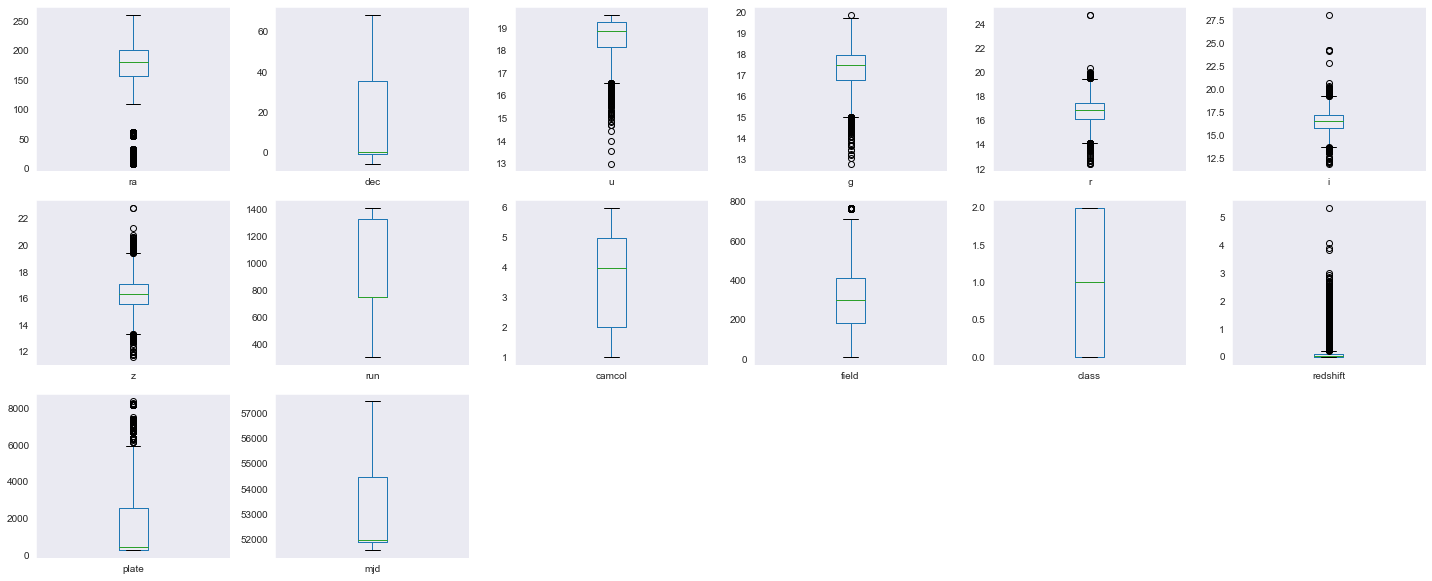

In [17]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
                       plt.subplot(6,6,i+1)
                       df.boxplot(col)
                       plt.grid()
                       plt.tight_layout()

 - We can see that we have outliers in few of the columns so lets deal with them by using zscore

In [18]:
qwe = ['ra','u','g','r','z','i','plate','redshift']
for col in qwe:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [19]:
df_no_outliers = df[(df.r_zscore>-3) & (df.r_zscore<3)
                     & (df.z_zscore>-3) & (df.z_zscore<3)
                     & (df.i_zscore>-3)&( df.i_zscore<3)
                     & (df.plate_zscore>-3) & (df.plate_zscore<3)
                     & (df.redshift_zscore>-3) & (df.redshift_zscore<3)
                     & (df.ra_zscore>-3) & (df.ra_zscore<3)
                     & (df.u_zscore>-3) & (df.u_zscore<3)
                     & (df.g_zscore>-3) & (df.g_zscore<3)]
df_no_outliers.head()

,ra,dec,u,g,r,i,z,run,camcol,field,...,plate,mjd,ra_zscore,u_zscore,g_zscore,r_zscore,z_zscore,i_zscore,plate_zscore,redshift_zscore
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,...,3306,54922,0.167458,1.031486,-0.348559,-0.837280,-0.995342,-0.946058,1.031489,-0.369731
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,...,323,51615,0.168862,0.052430,-0.166533,-0.154155,-0.026043,-0.082645,-0.636213,-0.369849
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,...,287,52023,0.170574,0.921568,0.867093,0.593154,0.314528,0.441201,-0.656339,-0.053027
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,...,3306,54922,0.174558,-1.030630,-0.813627,-0.636692,-0.430921,-0.526604,1.031489,-0.369993
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,...,3306,54922,0.174825,-1.290232,-1.172519,-0.376762,0.158276,-0.025101,1.031489,-0.368189


In [20]:
df.shape

(10000, 22)

In [21]:
df_no_outliers.shape

(8713, 22)

In [22]:
df_no_outliers.drop(['r_zscore','ra_zscore','u_zscore','z_zscore',
                     'i_zscore','g_zscore','plate_zscore','redshift_zscore'],axis=1,inplace=True)

In [23]:
df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
ra,8713.0,182.709793,36.073464,32.458408,161.313813,182.223292,203.656017,260.884382
dec,8713.0,14.407258,25.438018,-5.382632,-0.588312,0.336739,36.619503,68.542265
u,8713.0,18.632263,0.782312,16.134120,18.179400,18.845260,19.253720,19.599900
g,8713.0,17.332047,0.866353,14.568560,16.810180,17.465570,17.950810,19.738690
r,8713.0,16.772758,0.964549,13.705140,16.163170,16.809870,17.437910,19.590280
i,8713.0,16.500972,1.027871,13.232060,15.834150,16.498140,17.165660,19.744570
z,8713.0,16.332763,1.098526,12.817010,15.587650,16.321130,17.031580,20.021230
run,8713.0,969.857225,275.767958,308.000000,752.000000,756.000000,1331.000000,1412.000000
camcol,8713.0,3.667967,1.689459,1.000000,2.000000,4.000000,5.000000,6.000000
field,8713.0,315.426833,159.176833,11.000000,211.000000,304.000000,424.000000,768.000000


In [24]:
df_no_outliers.skew()

ra         -0.131080
dec         1.214165
u          -0.982213
g          -0.528614
r          -0.151366
i           0.059073
z           0.170787
run         0.517015
camcol     -0.143107
field       0.220889
class       0.289700
redshift    4.949300
plate       1.315894
mjd         0.959917
dtype: float64

 - We can see that almost all the  columns are moderately normally distributed.

# Model Building

In [25]:
X = df_no_outliers.drop("class",axis=1)

In [26]:
y = df_no_outliers['class']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
from sklearn.svm import SVC
classifier = SVC()

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [31]:
grid_search.best_params_

{'C': 1000, 'kernel': 'linear'}

 - We have got our best parameters now lets build the model

In [32]:
classifier = SVC(kernel = 'linear',C=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [34]:
accuracy

0.9919663351185922

 - Lets see the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1434,    6,    6],
       [   8,  122,    0],
       [   1,    0, 1037]], dtype=int64)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X_train,y_train,cv=10).mean()

0.9921295324234837

 - From the above cross_val score we can see that our model isn't either overfitting or underfitting

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1446
           1       0.95      0.94      0.95       130
           2       0.99      1.00      1.00      1038

    accuracy                           0.99      2614
   macro avg       0.98      0.98      0.98      2614
weighted avg       0.99      0.99      0.99      2614



 - After checkinf everything we are getting a very good score of 99% and cross validation proves that our model is not suffering from overfitting or underfitting
 - So lets save our model

In [39]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(classifier,'SVC_Space.pkl')

['SVC_Space.pkl']